In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

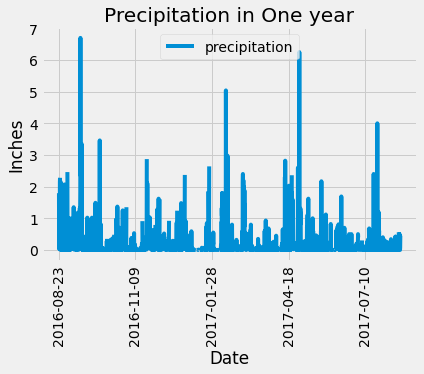

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# year_ago

# Perform a query to retrieve the data and precipitation scores

precipitation = session.query(measurement.date, measurement.prcp).\
    filter(func.strftime("%Y-%m-%d",measurement.date) >= year_ago).all()

# precipitation
                                                                                                  
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation, columns=['date', 'precipitation'])
date_index = precipitation_df.set_index('date')

# Sort the dataframe by date
prcp_date = date_index.sort_values(by='date')

# prcp_date
# Use Pandas Plotting with Matplotlib to plot the data

prcp_date.plot(xlabel="Date", ylabel= "Inches", title = "Precipitation in One year", rot = 90)

# format plot

plt.savefig('precipitation_in_one_year.png')
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_date.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# pd.read_sql('measurement',conn)

In [13]:
# pd.read_sql('station',conn)

In [14]:
# Design a query to calculate the total number stations in the dataset

station_count = session.query(station.id).distinct().count()
station_count

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# counts for each station
# connect with respective station

# List the stations and the counts in descending order.
# active = session.query(func.count(measurement.station)).filter(measurement.station == "USC00518838").all()

active_count =session.query(station.station, func.count(measurement.station)).select_from(measurement).\
    join(station, station.station == measurement.station).group_by(station.station).\
    order_by(func.count(measurement.station).desc()).all()

active_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#most active USC00519281
most_active = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station == "USC00519281").all()

print( f'lowest temperature: {most_active[0][0]}F, higest temperature: {most_active[0][1]}F, average temperature: {most_active[0][2]}F')

lowest temperature: 54.0F, higest temperature: 85.0F, average temperature: 71.66378066378067F


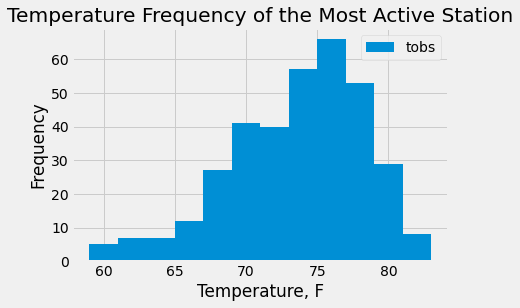

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_temp = session.query(measurement.date, measurement.tobs).filter(measurement.station == "USC00519281", func.strftime("%Y-%m-%d",measurement.date) >= year_ago).all()

#create df
active_temp_df = pd.DataFrame(active_temp, columns=['date', 'tobs'])

#plot
active_temp_df.plot(kind = 'hist', title = 'Temperature Frequency of the Most Active Station', bins = 12 )
plt.xlabel('Temperature, F')
plt.savefig('temp_freq_most_active.png')
plt.show()


# Close session

In [18]:
# Close Session
session.close()